<a href="https://colab.research.google.com/github/FacuRoffet99/PDI/blob/main/practico_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctico 2 - Procesamiento Digital de Imágenes

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
# %matplotlib inline

In [2]:
MAT_RGB2YIQ = np.array([[0.299, 0.587, 0.114],
                        [0.596,-0.275,-0.321],
                        [0.211,-0.523, 0.311]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, MAT_RGB2YIQ)

def yiq2rgb(img):
    return apply_matrix(img, np.linalg.inv(MAT_RGB2YIQ))

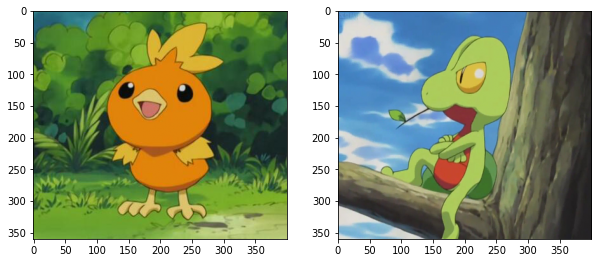

In [3]:
url_1 = 'https://pbs.twimg.com/media/BKRazDoCQAMpxDB.jpg'
url_2 = 'https://i.pinimg.com/originals/53/cb/07/53cb071d5f53f9a5f0161ae2343755f5.jpg'

import cv2

img_1 = imageio.imread(url_1)[:, 100:500, :]/255
img_2 = imageio.imread(url_2)/255
img_2 = cv2.resize(img_2, (599, 360))[:, 100:500, :]


fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)

## Aritmética de pixels

Implementar las siguientes operaciones aritméticas:

1. Suma y diferencia clampeada en RGB (la suma ya está hecha en el primer ejemplo)
2. Suma y diferencia promediada en RGB
3. Suma y diferencia en YIQ
4. If-lighter / If-darker

### 1.

In [ ]:
def clamped_sum(im1, im2):
  return np.clip(im1+im2,0,1)

def clamped_difference(im1, im2):
  return np.clip(im1-im2,0,1)

Text(0.5, 1.0, 'Suma clampeada RGB')

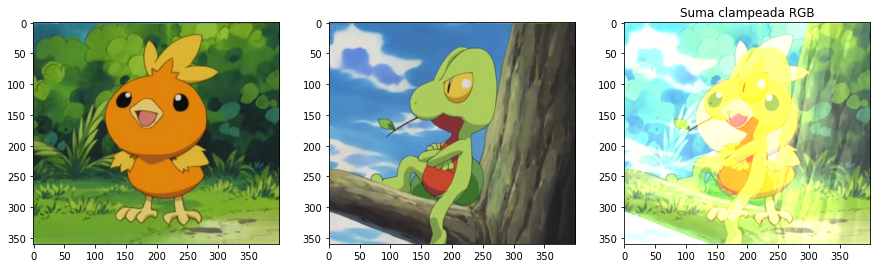

In [ ]:
# Suma clampleada
img_3 = clamped_sum(img_1,img_2)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_3)
axes[2].set_title('Suma clampeada RGB')

Text(0.5, 1.0, 'Resta clampeada RGB (orden invertido)')

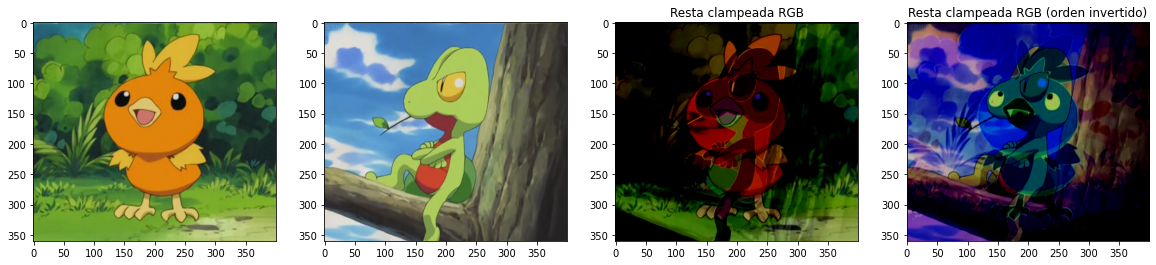

In [ ]:
# Resta clampleada
img_3 = clamped_difference(img_1,img_2)
img_4 = clamped_difference(img_2,img_1)

fig, axes = plt.subplots(1, 4, figsize=(20,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_3)
axes[2].set_title('Resta clampeada RGB')
axes[3].imshow(img_4)
axes[3].set_title('Resta clampeada RGB (orden invertido)')

### 2.

In [ ]:
def averaged_sum(im1, im2):
  return (im1+im2)/2

def averaged_difference(im1, im2):
  return (im1-im2)/2+128/255

Text(0.5, 1.0, 'Suma promediada RGB')

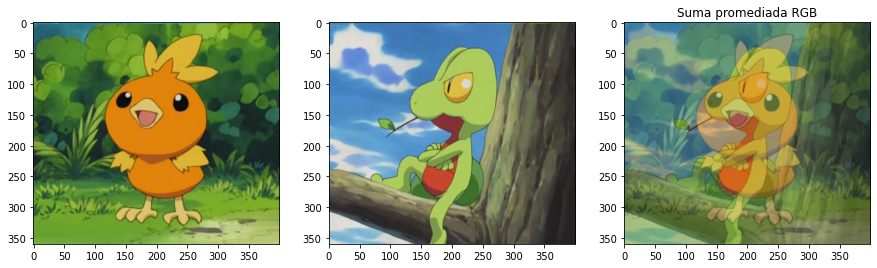

In [ ]:
# Suma promediada
img_3 = averaged_sum(img_1,img_2)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_3)
axes[2].set_title('Suma promediada RGB')

Text(0.5, 1.0, 'Resta promediada RGB (orden invertido)')

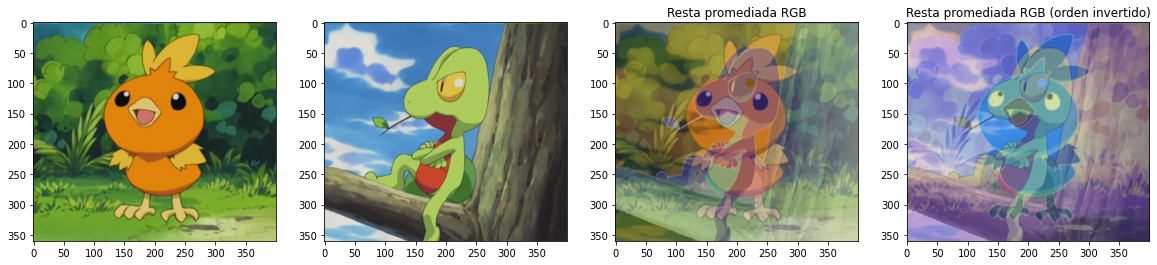

In [ ]:
# Resta promediada
img_3 = averaged_difference(img_1,img_2)
img_4 = averaged_difference(img_2,img_1)

fig, axes = plt.subplots(1, 4, figsize=(20,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_3)
axes[2].set_title('Resta promediada RGB')
axes[3].imshow(img_4)
axes[3].set_title('Resta promediada RGB (orden invertido)')

### 3.

In [32]:
def yiq_sum(im1, im2):
  # Convierto
  im1 = rgb2yiq(im1)
  im2 = rgb2yiq(im2)

  # Promedio ponderado
  new_y = (im1[:,:,0] + im2[:,:,0])/2
  new_i = (im1[:,:,0]*im1[:,:,1] + im2[:,:,0]*im2[:,:,1]) / (im1[:,:,0] + im2[:,:,0])
  new_q = (im1[:,:,0]*im1[:,:,2] + im2[:,:,0]*im2[:,:,2]) / (im1[:,:,0] + im2[:,:,0])

  # Junto todo
  im1[:,:,0] = new_y
  im1[:,:,1] = new_i
  im1[:,:,2] = new_q
  return np.clip(yiq2rgb(im1),0,1)

def yiq_difference(im1, im2):
  # Convierto
  im1 = rgb2yiq(im1)
  im2 = rgb2yiq(im2)

  # Resta ponderada
  new_y = (im1[:,:,0] - im2[:,:,0])/2 
  new_i = (im1[:,:,0]*im1[:,:,1] - im2[:,:,0]*im2[:,:,1]) / (im1[:,:,0] + im2[:,:,0])
  new_q = (im1[:,:,0]*im1[:,:,2] - im2[:,:,0]*im2[:,:,2]) / (im1[:,:,0] + im2[:,:,0])

  # Junto todo
  im1[:,:,0] = new_y + 0.5
  im1[:,:,1] = new_i
  im1[:,:,2] = new_q
  return np.clip(yiq2rgb(im1),0,1)

Text(0.5, 1.0, 'Suma YIQ')

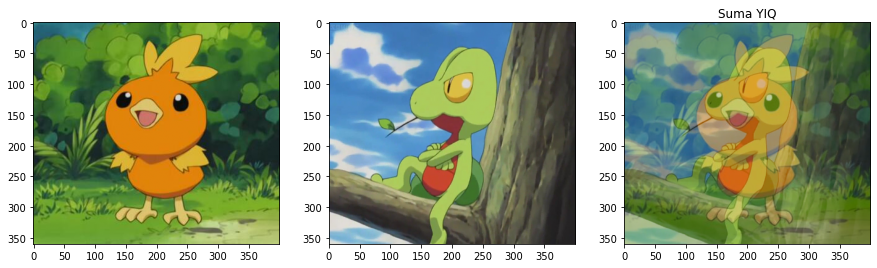

In [6]:
# Suma YIQ
img_3 = yiq_sum(img_1,img_2)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_3)
axes[2].set_title('Suma YIQ')

Text(0.5, 1.0, 'Resta YIQ (orden invertido)')

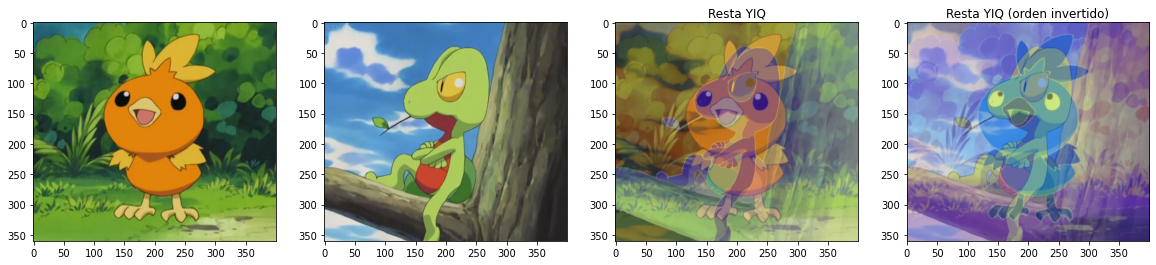

In [33]:
# Resta YIQ
img_3 = yiq_difference(img_1,img_2)
img_4 = yiq_difference(img_2,img_1)

fig, axes = plt.subplots(1, 4, figsize=(20,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_3)
axes[2].set_title('Resta YIQ')
axes[3].imshow(img_4)
axes[3].set_title('Resta YIQ (orden invertido)')

### 4.

In [ ]:
def if_lighter(im1,im2):
  # Convierto
  im1 = rgb2yiq(im1)
  im2 = rgb2yiq(im2)

  # Creo variable para el resultado
  res = np.zeros(im1.shape)

  # Creo máscaras
  mask_1 = im1[:,:,0] > im2[:,:,0]
  mask_2 = im1[:,:,0] < im2[:,:,0]

  # Me quedo con los píxeles más claros
  res[mask_1] = im1[mask_1]
  res[mask_2] = im2[mask_2]

  return np.clip(yiq2rgb(res),0,1)

def if_darker(im1,im2):
  # Convierto
  im1 = rgb2yiq(im1)
  im2 = rgb2yiq(im2)

  # Creo variable para el resultado
  res = np.zeros(im1.shape)

  # Creo máscaras
  mask_1 = im1[:,:,0] > im2[:,:,0]
  mask_2 = im1[:,:,0] < im2[:,:,0]

  # Me quedo con los píxeles más oscuros
  res[mask_1] = im2[mask_1]
  res[mask_2] = im1[mask_2]

  return np.clip(yiq2rgb(res),0,1)  

Text(0.5, 1.0, 'If-lighter')

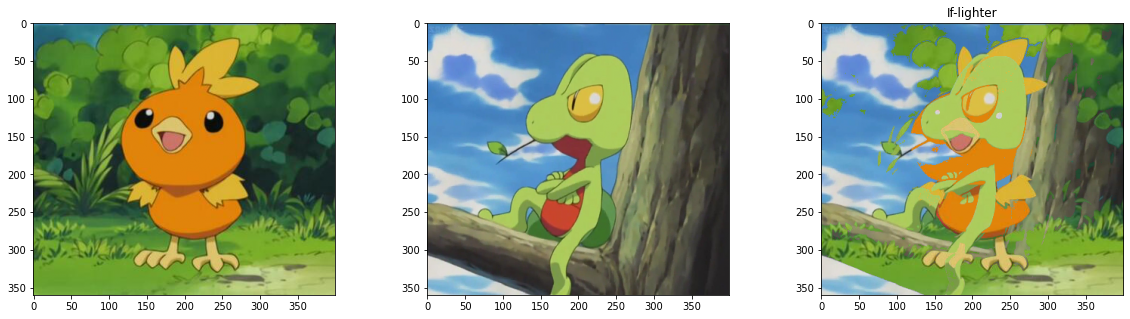

In [ ]:
# If-lighter
img_3 = if_lighter(img_1,img_2)

fig, axes = plt.subplots(1, 3, figsize=(20,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_3)
axes[2].set_title('If-lighter')

Text(0.5, 1.0, 'If-darker')

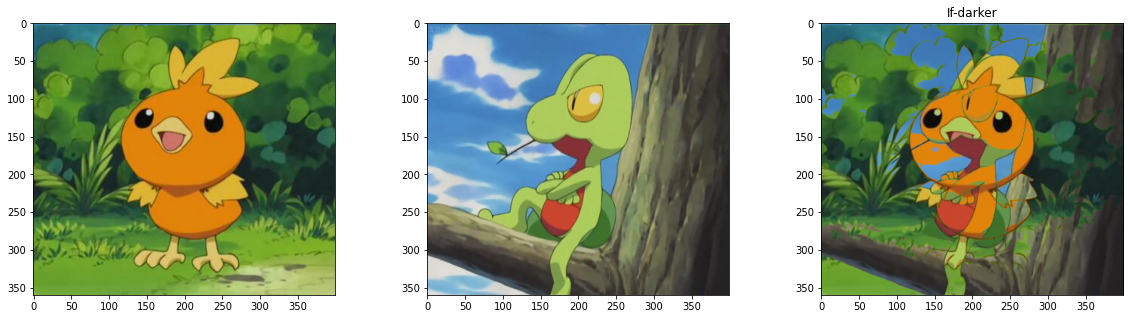

In [ ]:
# If-darker
img_3 = if_darker(img_1,img_2)

fig, axes = plt.subplots(1, 3, figsize=(20,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_3)
axes[2].set_title('If-darker')